In [1]:
import sys
import os
import tomotopy as tp
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
import itertools
import molmass

import matplotlib.pyplot as plt
import seaborn as sns
from pyteomics import mgf

from rdkit import Chem
import sklearn.metrics
from rdkit import DataStructs

/Users/reder/miniconda3/envs/f1000/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_mes = pd.read_csv("/media/gkreder/5TB/data/mass_spec/ms2_corr/llda/201029_llda_qbGrid/df_messar_handLabels.tsv", sep = '\t')

def get_mes_vec(s):
	mol = Chem.MolFromSmiles(s)
	vec = np.array([mol.HasSubstructMatch(Chem.MolFromSmarts(patt)) for patt in df_mes['smarts']]).astype(int)
	return(vec)
def get_mes_labels(s):
	v = get_mes_vec(s)
	return(df_mes.iloc[np.where(v > 0)]['index'].values)    

def glf(Q, B, x, v = 0.5, A = 0, K = 100, C = 1):
	res = (K - A) / np.power(C + Q * np.exp(-B * x), (1 / v))
	return(res)


In [172]:
df_ids = pd.read_csv("/media/gkreder/5TB/data/mass_spec/ms2_corr/f1000/test/standard_run/df_ids.tsv", sep = '\t', index_col = 0)
df_ids['mol'] = [Chem.MolFromSmiles(x) for x in df_ids.smiles]
df_ids = df_ids.dropna()
df_ids['rdkit_fp'] = [Chem.RDKFingerprint(x) for x in df_ids['mol']]

RDKit ERROR: [19:17:25] Explicit valence for atom # 12 N, 4, is greater than permitted


In [173]:
df_ids_train = df_ids[df_ids.index.str.contains('_train')].copy()
df_ids_test = df_ids[df_ids.index.str.contains('_test')].copy()

In [188]:
test_output = [get_train_sims(d) for d in tqdm(df_ids_test.index)]
maxes, mins, means, medians = zip(*test_output)
df_ids_test['max_train_sim'] = maxes
df_ids_test['mins_train_sim'] = mins
df_ids_test['means_train_sim'] = means
df_ids_test['medians_train_sim'] = medians
df_ids_test['uniform_train_sim'] = 1.0

In [161]:
def get_train_sims(d):
    fp_d = df_ids.loc[d]['rdkit_fp']
    fp_sims = [DataStructs.FingerprintSimilarity(fp_d, fp) for fp in df_ids_train['rdkit_fp']]
    return(np.max(fp_sims), np.min(fp_sims), np.mean(fp_sims), np.median(fp_sims))

In [22]:
df_sims_baseline = pd.read_csv("/media/gkreder/5TB/data/mass_spec/ms2_corr/f1000/test/standard_run/baseline/df_preds.tsv", sep = '\t', index_col = 0)

In [29]:
df_sims_llda = pd.read_csv("/media/gkreder/5TB/data/mass_spec/ms2_corr/f1000/test/standard_run/llda/df_sims.tsv", sep = '\t', index_col = 0)
df_sims_llda = df_sims_llda.T
df_sims_llda.index = df_sims_llda.index + '_test'

In [5]:
df_labels = pd.read_csv("/media/gkreder/5TB/data/mass_spec/ms2_corr/f1000/test/standard_run/df_labels.tsv", sep = '\t', index_col = 0)

In [45]:
df_labels_test = df_labels[df_labels.index.str.contains('_test')]
df_labels_train = df_labels[df_labels.index.str.contains('_train')]

In [32]:
df_sims_baseline

,mh0,mh1,mh2,mh3,mh4,mh5,mh6,mh7,mh8,mh9,...,mh702,mh703,mh704,mh705,mh706,mh707,mh708,mh709,mh710,mh711
id,,,,,,,,,,,,,,,,,,,,,
1_test,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7,0.0,...,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0
2_test,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,...,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3_test,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0
4_test,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0
5_test,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,...,0.0,0.0,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181_test,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,...,0.0,0.0,0.0,0.0,0.1,0.0,0.1,0.0,0.0,0.0
182_test,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
183_test,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,...,0.0,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [319]:
c = 'mh0'
good_cs_structs = []
rows = []
for c in df_labels_test.columns:
    if df_labels_train[c].sum() == 0.0 or df_labels_test[c].sum() == 0.0:
        continue
    aprec_baseline = sklearn.metrics.average_precision_score(df_labels_test[c], df_sims_baseline[c])
    aprec_llda = sklearn.metrics.average_precision_score(df_labels_test[c], df_sims_llda[c])
    roc_auc_baseline = sklearn.metrics.roc_auc_score(df_labels_test[c], df_sims_baseline[c])
    roc_auc_llda = sklearn.metrics.roc_auc_score(df_labels_test[c], df_sims_llda[c])
    rows.append((c, aprec_baseline, aprec_llda, roc_auc_baseline, roc_auc_llda))
    good_cs_structs.append(c)
df_res = pd.DataFrame(rows, columns = ['c', 'prec_baseline', 'prec_llda', 'auc_baseline', 'auc_llda'])

good_cs_docs = []
for d in df_labels_test.index:
    if df_labels_test.loc[d].sum() > 0:
        good_cs_docs.append(d)

In [320]:
df_res['prec'] = df_res['prec_llda'] - df_res['prec_baseline']
df_res['auc'] = df_res['auc_llda'] - df_res['auc_baseline']
# df_res = df_res[['c', 'prec', 'auc']].copy()

In [321]:
df_res[['c', 'prec', 'auc']].sort_values(by = 'prec', ascending = False)

,c,prec,auc
262,mh528,0.494595,0.565217
52,mh106,0.327928,0.543478
210,mh426,0.327928,0.535326
218,mh440,0.322507,-0.185897
266,mh535,0.263657,0.152930
...,...,...,...
261,mh527,-0.404009,0.051105
141,mh298,-0.427838,-0.240128
168,mh348,-0.495559,-0.248168
275,mh560,-0.666776,-0.226776


Text(0.5, 1.0, 'Avg Baseline - 0.23485892200581598 \n Avg LLDA - 0.15498638577100496')

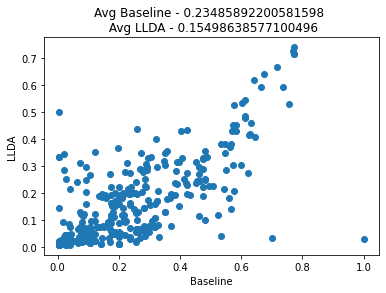

In [322]:
# plt.scatter(df_res['prec'], df_res['auc'])
plt.scatter(df_res['prec_baseline'], df_res['prec_llda'])
plt.xlabel('Baseline')
plt.ylabel('LLDA')
plt.title(f"Avg Baseline - {df_res['prec_baseline'].mean()} \n Avg LLDA - {df_res['prec_llda'].mean()}")

In [338]:
weights

1_test      1.0
2_test      1.0
3_test      1.0
4_test      1.0
5_test      1.0
           ... 
181_test    1.0
182_test    1.0
183_test    1.0
184_test    1.0
185_test    1.0
Name: uniform_train_sim, Length: 185, dtype: float64

In [342]:
test_sums = df_labels_test.multiply(weights, axis = 'index').sum()

In [343]:
test_sums

mh0      0.0
mh1      5.0
mh2      0.0
mh3      0.0
mh4      0.0
        ... 
mh707    2.0
mh708    0.0
mh709    0.0
mh710    1.0
mh711    0.0
Length: 712, dtype: float64

In [333]:
df_labels_train.multiply(weights, axis = 'index').sum()

mh0      0.0
mh1      0.0
mh2      0.0
mh3      0.0
mh4      0.0
        ... 
mh707    0.0
mh708    0.0
mh709    0.0
mh710    0.0
mh711    0.0
Length: 712, dtype: float64

In [359]:
(df_labels_test[gcs].multiply(weights, axis = 'index').sum() == 0).any()

False

## Looking at increasingly dissimilar documents in the test set

In [543]:
avg = 'macro'
# for weighting in ['uniform', 'max', 'mins', 'means', 'medians']:
for weighting in ['uniform', 'max', 'mins']:
    print(weighting)
    weights = df_ids_test[f"{weighting}_train_sim"].loc[df_labels_test.index]
    if weighting != 'uniform':
        weights = weights / weights.max()
        weights = 1 - weights
    weights = pd.cut(weights, [0.0, 0.5, 1.0], labels = False).fillna(value = 0.0)
    weighted_sums = df_labels_test.multiply(weights, axis = 'index').sum()
    gcs = (weighted_sums[weighted_sums > 0]).index.values
    gcs = list(set(df_sims_llda.columns).intersection(set(gcs)))
#     for avg in ['micro', 'macro', 'samples', 'weighted']:
    for avg in ['macro']:
        if avg != 'samples':
            gds = df_labels_test.index
        else:
            doc_sums = df_labels_test.sum(axis = 1)
            gds = doc_sums[doc_sums > 0].index
        auc_baseline = sklearn.metrics.roc_auc_score(df_labels_test.loc[gds][gcs], df_sims_baseline.loc[gds][gcs], average = avg, sample_weight = weights.loc[gds].values)
        auc_llda = sklearn.metrics.roc_auc_score(df_labels_test.loc[gds][gcs], df_sims_llda.loc[gds][gcs], average = avg, sample_weight = weights.loc[gds].values)
        print(avg, auc_baseline, auc_llda, auc_llda - auc_baseline)
    print('')

uniform
macro 0.6860239447684823 0.5829230066757052 -0.1031009380927771

max
macro 0.5975024504191229 0.6148328563688551 0.01733040594973223

mins
macro 0.750334308187155 0.7608909614854741 0.010556653298319119



In [555]:
min_similarities = df_ids_test["mins_train_sim"].loc[df_labels_test.index]
max_similarities = df_ids_test["max_train_sim"].loc[df_labels_test.index]
substruct_differences = (df_labels_test.sum() / len(df_labels_test)) - (df_labels_train.sum() / len(df_labels_train))
percentiles = np.arange(0, 1.05, .05)

In [579]:
min_sim_runs = list(itertools.product(min_similarities.quantile(percentiles).values, substruct_differences.quantile(percentiles).values))
min_sim_runs = [('mins', x[0], x[1]) for x in min_sim_runs]
max_sim_runs = list(itertools.product(max_similarities.quantile(percentiles).values, substruct_differences.quantile(percentiles).values))
max_sim_runs = [('max', x[0], x[1]) for x in max_sim_runs]
runs = min_sim_runs + max_sim_runs

In [604]:
mode, sim_val, struct_val = max_sim_runs[0]
mode, sim_val, struct_val

('max', 0.08943089430894309, -0.2836772564045291)

In [793]:
def get_aucs(mode, sim_val, struct_val, test = False):
    mode_sims = df_ids_test[f"{mode}_train_sim"].loc[df_labels_test.index]
    keep_docs = mode_sims[mode_sims <= sim_val].index
    keep_docs_multiply = pd.Series(df_labels_test.index.isin(keep_docs).astype(float), index = df_labels_test.index)
    weighted_sums = df_labels_test.multiply(keep_docs_multiply, axis = 'index').sum()
    keep_structs = (weighted_sums[weighted_sums > 0]).index.values
    keep_structs = list(set(df_sims_llda.columns).intersection(set(keep_structs)))
    keep_structs = list(set(substruct_differences[substruct_differences >= struct_val].index).intersection(set(keep_structs)))
    if test:
        return(keep_docs, keep_structs)
    try:
        auc_baseline = sklearn.metrics.roc_auc_score(df_labels_test.loc[keep_docs][keep_structs], df_sims_baseline.loc[keep_docs][keep_structs], average = 'macro')
        auc_llda = sklearn.metrics.roc_auc_score(df_labels_test.loc[keep_docs][keep_structs], df_sims_llda.loc[keep_docs][keep_structs], average = 'macro')
        return(auc_baseline, auc_llda)
    except:
        return((None, None))

In [726]:
from joblib import Parallel, delayed

In [727]:
output = Parallel(n_jobs = 30)(delayed(get_aucs)(*x) for x in tqdm(runs))

In [729]:
rows = [list(x) + list(output[i]) for i, x in enumerate(runs)]
df_out = pd.DataFrame(rows, columns = ['mode', 'sim_cutoff', 'struct_cutoff', 'auc_baseline', 'auc_llda'])
df_out['llda-baseline'] = df_out['auc_llda'] - df_out['auc_baseline']

In [752]:
df_struct_cutoffs = pd.DataFrame(substruct_differences.quantile(percentiles)).reset_index().rename(columns = {'index' : 'percentile', 0 : 'value'})

In [770]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors

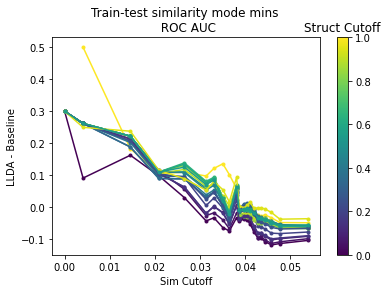

In [792]:
mode = 'mins'
df_plot = df_out[df_out['mode'] == mode]
colormap = cm.viridis
# colorparams = df_plot['struct_cutoff'].values
colorparams = df_struct_cutoffs['percentile'].values
normalize = mcolors.Normalize(vmin=np.min(colorparams), vmax=np.max(colorparams))
for struct_cutoff in set(df_plot['struct_cutoff']):
    percentile = df_struct_cutoffs.iloc[np.abs(df_struct_cutoffs['value'] - struct_cutoff).argmin()]['percentile']
    df = df_plot[df_plot['struct_cutoff'] == struct_cutoff].dropna()
#     color = colormap(normalize(struct_cutoff))
    color = colormap(normalize(percentile))
    plt.plot(df['sim_cutoff'], df['llda-baseline'], marker='.', linestyle='-' ,label = f'{round(struct_cutoff, 2)}', color = color)
plt.xlabel("Sim Cutoff")
plt.ylabel('LLDA - Baseline')
s_map = cm.ScalarMappable(norm=normalize, cmap=colormap)
s_map.set_array(colorparams)
cbar = plt.colorbar(s_map)
# cbar.set_label('Struct Cutoff')
cbar.ax.set_title('Struct Cutoff')
plt.title(f"Train-test similarity mode {mode} \n ROC AUC")
plt.savefig(f"/media/gkreder/5TB/data/mass_spec/ms2_corr/llda/210303_{mode}DocSimilarities_rocAucs.pdf", bbox_inches = 'tight')
# # , spacing='proportional', ticks=colorparams, boundaries=boundaries, format='%2.2g') # format='%2i' for integer
# # plt.legend(bbox_to_anchor = (1.05, 1), title = 'Struct Cutoff')

In [824]:
# df_struct_cutoffs

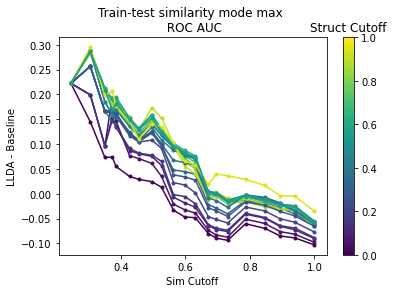

In [826]:
mode = 'max'
df_plot = df_out[df_out['mode'] == mode]
colormap = cm.viridis
# colorparams = df_plot['struct_cutoff'].values
colorparams = df_struct_cutoffs['percentile'].values
normalize = mcolors.Normalize(vmin=np.min(colorparams), vmax=np.max(colorparams))
for struct_cutoff in set(df_plot['struct_cutoff']):
    percentile = df_struct_cutoffs.iloc[np.abs(df_struct_cutoffs['value'] - struct_cutoff).argmin()]['percentile']
    if percentile >= 0.999:
        continue
    df = df_plot[df_plot['struct_cutoff'] == struct_cutoff].dropna()
#     color = colormap(normalize(struct_cutoff))
    color = colormap(normalize(percentile))
    plt.plot(df['sim_cutoff'], df['llda-baseline'], marker='.', linestyle='-', label = f'{round(struct_cutoff, 2)}', color = color)
plt.xlabel("Sim Cutoff")
plt.ylabel('LLDA - Baseline')
s_map = cm.ScalarMappable(norm=normalize, cmap=colormap)
s_map.set_array(colorparams)
cbar = plt.colorbar(s_map)
# cbar.set_label('Struct Cutoff')
cbar.ax.set_title('Struct Cutoff')
plt.title(f"Train-test similarity mode {mode} \n ROC AUC")
plt.savefig(f"/media/gkreder/5TB/data/mass_spec/ms2_corr/llda/210303_{mode}DocSimilarities_rocAucs.pdf", bbox_inches = 'tight')
# # , spacing='proportional', ticks=colorparams, boundaries=boundaries, format='%2.2g') # format='%2i' for integer
# # plt.legend(bbox_to_anchor = (1.05, 1), title = 'Struct Cutoff')

## Draw individual ROC plots for reference

In [796]:
keep_docs, keep_structs = get_aucs(mode = 'max', sim_val = 1.0, struct_val = 0.0, test = True)

In [798]:
# auc_baseline = sklearn.metrics.roc_auc_score(df_labels_test.loc[keep_docs][keep_structs], df_sims_baseline.loc[keep_docs][keep_structs], average = 'macro')
# auc_llda = sklearn.metrics.roc_auc_score(df_labels_test.loc[keep_docs][keep_structs], df_sims_llda.loc[keep_docs][keep_structs], average = 'macro')

In [827]:
labs = df_labels_test.loc[keep_docs]['mh220']
smiles = "CCC(=O)NC(C)C"
pred = df_sims_llda.loc[keep_docs]['mh220']
fpr, tpr, _ = sklearn.metrics.roc_curve(labs, pred)
auc = sklearn.metrics.auc(fpr, tpr)

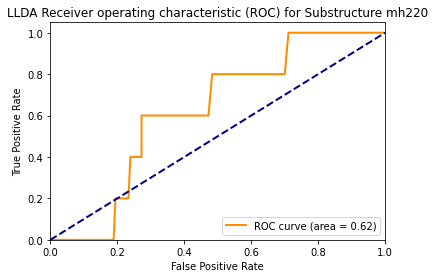

In [828]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LLDA Receiver operating characteristic (ROC) for Substructure mh220')
plt.legend(loc="lower right")
plt.savefig("/media/gkreder/5TB/data/mass_spec/ms2_corr/llda/210303_llda_egRoc_mh220.pdf")
plt.show()


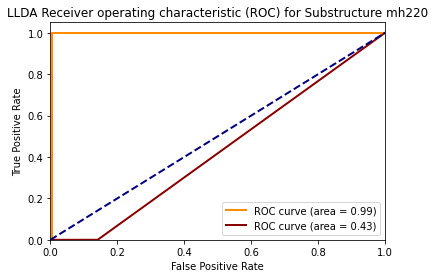

In [833]:
labs = df_labels_test.loc[keep_docs]['mh528']
# smiles = "CCC(=O)NC(C)C"
pred = df_sims_llda.loc[keep_docs]['mh528']
pred_baseline = df_sims_baseline.loc[keep_docs]['mh528']
fpr, tpr, _ = sklearn.metrics.roc_curve(labs, pred)
fpr_baseline, tpr_baseline, _ = sklearn.metrics.roc_curve(labs, pred_baseline)
auc = sklearn.metrics.auc(fpr, tpr)
auc_baseline = sklearn.metrics.auc(fpr_baseline, tpr_baseline)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot(fpr_baseline, tpr_baseline, color='darkred', lw=lw, label='ROC curve (area = %0.2f)' % auc_baseline)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LLDA Receiver operating characteristic (ROC) for Substructure mh220')
plt.legend(loc="lower right")
plt.show()


In [836]:
df_labels_test['mh528'].sum()

1.0